In [100]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import datetime 
import numpy as np

In [101]:
def downloadpage(url):
    re = requests.get(url)
    soup = BeautifulSoup(re.text,"html.parser")
    return soup

In [102]:
def since(daterange):
    daterange.lower()
    url = ''
    if daterange == "a":
        url = "https://github.com/trending?since=monthly"
    elif daterange == "b":
        url = "https://github.com/trending?since=weekly"
    else:
        url = "https://github.com/trending?since=daily"
    return url

In [103]:
userinput  = input("Choose (a) for Monthly -(b) for Weekly -(c) for Daily: ")
url  = since(userinput)

Choose (a) for Monthly -(b) for Weekly -(c) for Daily: c


In [104]:
page = downloadpage(url)

In [105]:
def user(box):
    h1 =box.find("h1",class_="h3 lh-condensed")
    a = h1.find('a',href=True)
    return a['href'][1:]

In [106]:
def technology(box):
    div = box.find("div",class_="f6 color-fg-muted mt-2")
    lang = div.find("span",itemprop = "programmingLanguage")
    if lang!=None:
            return lang.text
    else:
            return "None"

In [107]:
def starsnForks(box):
    a = box.find_all('a',class_="Link--muted d-inline-block mr-3")
    starnfork = [a[0].get_text().strip(),a[1].get_text().strip()]
    return starnfork

In [108]:
def builtBy(box):
    span = box.find('span',class_="d-inline-block mr-3")
    return [x.get('href')[1:] for x in span.find_all('a',class_="d-inline-block")]

In [109]:
def main(page):
    for box in page.find_all("article",class_='Box-row'):
        users = user(box)
        tech = technology(box)
        star = starsnForks(box)[0]
        fork = starsnForks(box)[1]
        contributers = builtBy(box)
        row = {"Repository":users,"Technology":tech,"Stars":star,"Forks":fork,"Built_by":contributers}
        table.loc[len(table)] = [users,tech,star,fork,contributers]

In [110]:
table=pd.DataFrame({"Repository":[],"Technology":[],"Stars":[],"Forks":[],"Built_by":[]})
main(page)

In [111]:
table.head()

,Repository,Technology,Stars,Forks,Built_by
0,AzeemIdrisi/PhoneSploit-Pro,Python,522,82,[AzeemIdrisi]
1,flutter/news_toolkit,Dart,288,43,"[bselwe, felangel, Jan-Stepien, simpson-peter,..."
2,bregman-arie/devops-exercises,Python,"36,035","8,242","[surister, austinsonger, bregman-arie, knoxkno..."
3,localsend/localsend,Dart,821,30,"[Tienisto, Lapis-Apple]"
4,papers-we-love/papers-we-love,Shell,"68,862","5,061","[zeeshanlakhani, DarrenN, jeremyheiler, newsom..."


In [112]:
userrepo = table["Repository"].str.split("/",n=1,expand =True)

In [113]:
table["User"] = userrepo[0]

In [114]:
table.drop(columns=["Repository"],inplace=True)

In [115]:
table["Repository"] = userrepo[1]

In [116]:
column = table.pop("User")
table.insert(0,'User',column)

In [117]:
column = table.pop("Repository")
table.insert(1,'Repository',column)

In [118]:
table["Contributions"] = table["Built_by"].apply(lambda row: len(row))

In [119]:
table.head()

,User,Repository,Technology,Stars,Forks,Built_by,Contributions
0,AzeemIdrisi,PhoneSploit-Pro,Python,522,82,[AzeemIdrisi],1
1,flutter,news_toolkit,Dart,288,43,"[bselwe, felangel, Jan-Stepien, simpson-peter,...",5
2,bregman-arie,devops-exercises,Python,"36,035","8,242","[surister, austinsonger, bregman-arie, knoxkno...",5
3,localsend,localsend,Dart,821,30,"[Tienisto, Lapis-Apple]",2
4,papers-we-love,papers-we-love,Shell,"68,862","5,061","[zeeshanlakhani, DarrenN, jeremyheiler, newsom...",5


In [120]:
fname = datetime.datetime.now().strftime("%b_%d_%H_%M")

In [121]:
table.to_csv(f"{fname}_{url.split('=')[1]}.csv")

<BarContainer object of 5 artists>

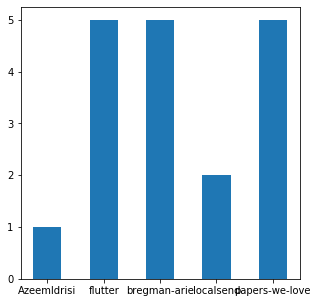

In [126]:
plt.figure(figsize=(5,5))
plt.bar(table["User"][:5],table['Contributions'][:5],width=0.5)

In [123]:
data = dict(table['Technology'].value_counts())
data

{'Python': 6,
 'None': 5,
 'Dart': 3,
 'TypeScript': 3,
 'JavaScript': 2,
 'C++': 1,
 'Jupyter Notebook': 1,
 'HTML': 1,
 'Rust': 1,
 'Shell': 1,
 'Java': 1}

In [124]:
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%".format(pct, absolute)

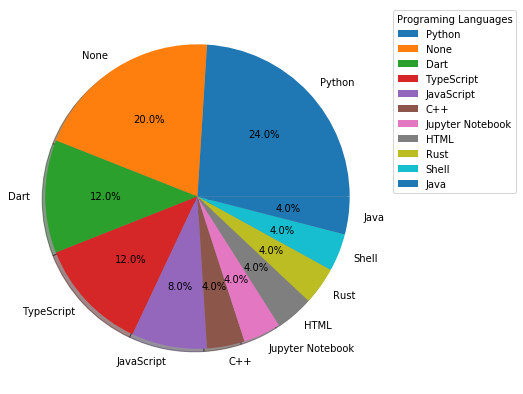

In [125]:
fig, ax = plt.subplots(figsize =(7, 7))
ax.pie(list(data.values()),autopct = lambda pct: func(pct, list(data.values())),labels=list(data.keys()),shadow=True)
ax.legend(title ="Programing Languages",loc ="center left",bbox_to_anchor =(1, 0, 0.5, 1.5))
plt.show()